In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import analysis_functions as af
import os
import shutil

# TRCC MAGeCk Data

In [2]:
FUUR1 = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/FUUR1_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
STFE = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/STFE_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
UOK109 = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/UOK109_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
UOK146 = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/UOK146_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)

tRCC_comb_MAGeCK_qVal = af.CombineDFsCol([FUUR1, STFE, UOK109, UOK146], "neg|fdr", ["FUUR1", "STFE", "UOK109", "UOK146"])
tRCC_comb_MAGeCK_geneScore = af.CombineDFsCol([FUUR1, STFE, UOK109, UOK146], "neg|score", ["FUUR1", "STFE", "UOK109", "UOK146"])

mean_tRCC_MAGeCK_qVal = tRCC_comb_MAGeCK_qVal.mean(axis=1)
mean_tRCC_MAGeCK_geneScore = tRCC_comb_MAGeCK_geneScore.mean(axis=1)

In [3]:
FUUR1

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
HSPA5,4,1.299300e-10,2.366200e-07,0.000261,1,4,-3.83120,1.000000e+00,1.000000e+00,1.000000,20922,0,-3.83120
RPS16,4,4.282000e-10,2.366200e-07,0.000261,2,4,-3.45840,1.000000e+00,1.000000e+00,1.000000,20838,0,-3.45840
FAU,4,1.578800e-09,2.366200e-07,0.000261,3,4,-3.37700,1.000000e+00,1.000000e+00,1.000000,20921,0,-3.37700
RPL7,4,2.992800e-09,2.366200e-07,0.000261,4,4,-2.76380,1.000000e+00,1.000000e+00,1.000000,20920,0,-2.76380
LUC7L3,4,6.144200e-09,2.366200e-07,0.000261,5,4,-3.01840,1.000000e+00,1.000000e+00,1.000000,20919,0,-3.01840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMSB4Y,4,9.999400e-01,9.999400e-01,1.000000,20918,0,0.81519,5.581400e-05,2.122500e-04,0.354125,10,4,0.81519
VSX1,4,9.999600e-01,9.999500e-01,1.000000,20919,0,0.81552,4.423900e-05,1.672900e-04,0.350000,8,4,0.81552
POTENTIALLY_ACTIVE_129,1,9.999800e-01,9.999800e-01,1.000000,20920,0,1.90410,1.951500e-05,1.774600e-05,0.123762,4,1,1.90410


In [4]:
tRCC_comb_MAGeCK_qVal

,FUUR1,STFE,UOK109,UOK146
id,,,,
HSPA5,0.000261,0.000101,0.000225,0.002144
RPS16,0.000261,0.000101,0.000225,0.001755
FAU,0.000261,0.000101,0.000225,0.021371
RPL7,0.000261,0.000101,0.000753,0.010536
LUC7L3,0.000261,0.000101,0.000225,0.051062
...,...,...,...,...
TMSB4Y,1.000000,1.000000,1.000000,0.999999
VSX1,1.000000,1.000000,1.000000,0.999999
POTENTIALLY_ACTIVE_129,1.000000,1.000000,1.000000,0.999999


In [5]:
tRCC_MAGeCK_sig_df = mean_tRCC_MAGeCK_qVal[mean_tRCC_MAGeCK_qVal < 0.05]

print("Number of significant genes (q<0.05) tested by MAGeCK algorithm: {0}".format(len(tRCC_MAGeCK_sig_df.index)))

Number of significant genes (q<0.05) tested by MAGeCK algorithm: 580


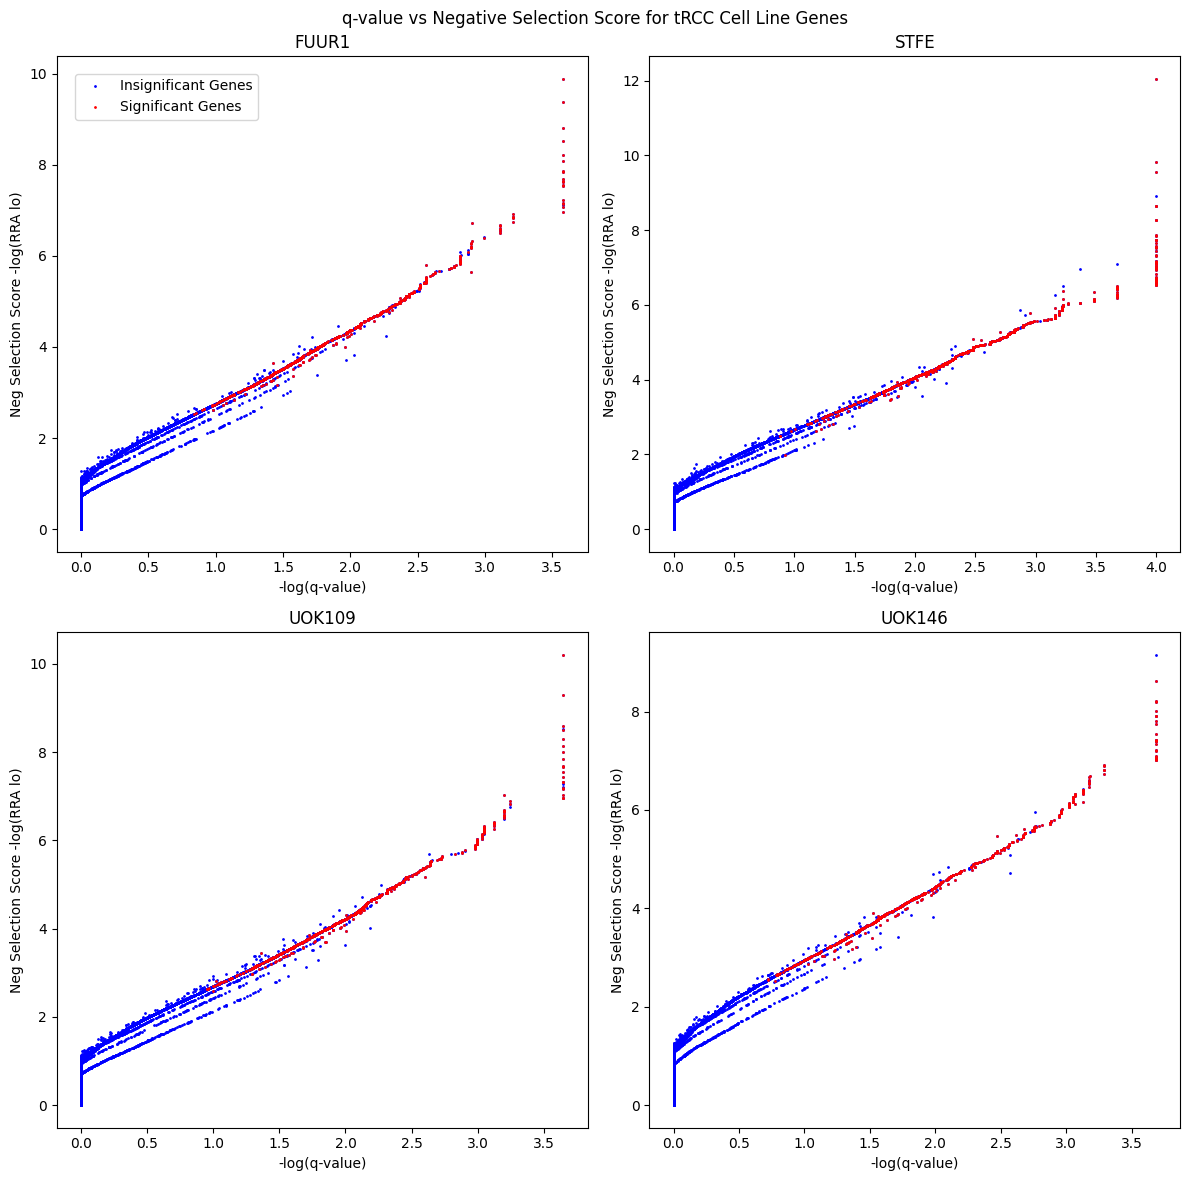

Average Pearson Correlation between Negative Selection Scores and qVals between cell lines:  0.6104256886050745


In [20]:
cell_lines = [FUUR1, STFE, UOK109, UOK146]
cell_line_names = ['FUUR1', 'STFE', 'UOK109', 'UOK146']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, (cell_line_df, cell_line_name) in enumerate(zip(cell_lines, cell_line_names)):

    ax = axes[i // 2, i % 2]

    cell_line_data = cell_line_df.copy()
    cell_line_data["neg|fdr"] = -np.log10(cell_line_data["neg|fdr"])
    cell_line_data["neg|score"] = -np.log10(cell_line_data["neg|score"])
    cell_line_data = cell_line_data.sort_values("neg|score", ascending=False)

    # Plot all genes
    ax.scatter(
        cell_line_data["neg|fdr"],
        cell_line_data["neg|score"],
        s=1,
        color='blue',  # Using blue for normal genes for contrast
    )

    # Plot highlighted genes in red
    highlighted_data = cell_line_data[cell_line_data.index.isin(tRCC_MAGeCK_sig_df.index)]
    ax.scatter(
        highlighted_data["neg|fdr"],
        highlighted_data["neg|score"],
        color='red',
        s=1,  # Adjust the size for visibility
    )

    ax.set_xlabel("-log(q-value)")
    ax.set_ylabel("Neg Selection Score -log(RRA lo)")
    ax.set_title(f"{cell_line_name}")

blue_dot = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=1, label='Insignificant Genes')
red_dot = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                         markersize=1, label='Significant Genes')

plt.suptitle("q-value vs Negative Selection Score for tRCC Cell Line Genes")
plt.figlegend(handles=[blue_dot, red_dot], bbox_to_anchor=(0.225, 0.9325))
plt.tight_layout()
plt.show()

corrs = []
for cell_line_data in cell_lines:
    
    qVals = cell_line_data["neg|fdr"]
    negScores = cell_line_data["neg|score"]
    
    corrs.append(qVals.corr(negScores))

print("Average Pearson Correlation between Negative Selection Scores and qVals between cell lines: ", np.mean(corrs))

# DFCI - tRCC/ccRCC CHRONOS Scores

In [7]:
DFCI_chronos_dataset = pd.read_csv("/Users/harshel/Documents/harvard/predicting_cancer_gene_dependencies/datasets/tRCC_cell_lines/Chronos/tRCC_chronos_summary_for_BL_ASPS_updated.csv")

DFCI_chronos_CCLs = DFCI_chronos_dataset[["Gene", "PC3", "CAKI2", "CAKI1", "786O", "DU145", "HCT116", "NCIH460", "FUUR1", "STFE", "UOK109"]].T
DFCI_chronos_CCLs.columns = DFCI_chronos_CCLs.iloc[0]
DFCI_chronos_CCLs.columns.name = ""
DFCI_chronos_CCLs.drop(DFCI_chronos_CCLs.index[0], inplace=True)

DFCI_chronos_CCLs = DFCI_chronos_CCLs.loc[:, ~(DFCI_chronos_CCLs == 'Unknown').any(axis=0)].apply(pd.to_numeric, errors='coerce').dropna(axis=1)

tRCC_chronos_gene_effects = DFCI_chronos_CCLs.loc[["FUUR1", "STFE", "UOK109"]]

ccRCC_chronos_gene_effects = DFCI_chronos_CCLs.loc[["PC3", "CAKI2", "CAKI1", "786O", "DU145", "HCT116", "NCIH460"]]

In [8]:
tRCC_chronos_gene_effects

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
FUUR1,0.021712,0.086697,-0.082493,-0.132340,0.020231,0.036708,-0.075862,-0.128253,-0.051822,-0.130827,...,-0.009999,-0.459520,0.023324,0.053150,-0.025425,-0.124613,0.007484,-0.251481,-0.166529,-0.659025
STFE,-0.012644,0.005641,-0.017527,0.020927,-0.051886,-0.052648,-0.149426,-0.505381,-0.111710,-0.141783,...,-0.218224,-0.550891,0.162938,-0.007641,-0.061775,-0.087376,-0.024138,0.105014,-0.003020,-0.519862
UOK109,0.019238,0.092213,-0.060882,-0.265368,0.116947,-0.032012,0.031059,-0.140754,-0.044788,-0.083234,...,-0.227428,-0.518076,0.132250,0.095682,-0.097062,0.020961,0.059527,-0.155354,-0.040907,-0.500199


In [9]:
ccRCC_chronos_gene_effects

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
PC3,0.017377,-0.224036,-0.089727,-0.048324,-0.105465,0.079081,0.094345,0.258997,0.199733,0.178254,...,-0.139745,-0.505528,-0.256678,-0.166829,-0.050240,0.129286,-0.205720,-0.102268,-0.006032,-0.336853
CAKI2,0.173071,-0.064502,-0.063877,0.074182,-0.092830,-0.123178,0.034149,-0.125962,-0.218054,0.148593,...,0.041716,-0.153243,-0.124159,0.014792,-0.056845,0.037725,-0.269112,0.085625,-0.418214,-0.402716
CAKI1,-0.212095,0.025230,0.162061,0.069329,-0.078785,0.241850,-0.097070,-0.226941,-0.151700,0.158705,...,-0.208985,-0.614402,-0.002923,-0.021960,0.204778,-0.109925,0.031072,-0.090119,-0.122946,-0.174999
786O,-0.204959,-0.052818,-0.036369,0.076836,-0.013163,0.257554,0.043579,-0.064291,-0.158900,0.035887,...,-0.301190,-0.323170,0.102823,-0.028448,-0.066420,-0.006306,-0.196235,-0.290291,-0.084288,-0.287418
DU145,0.087227,-0.046054,0.042095,0.200913,-0.015387,0.218228,0.006136,-0.007140,0.157901,0.119677,...,0.110734,0.421803,0.213536,0.110973,-0.149547,-0.012157,-0.265347,0.032035,-0.147979,-0.575238
HCT116,0.204475,-0.052869,0.090832,-0.095263,-0.080494,0.226334,0.057638,-0.161678,-0.018755,0.232876,...,-0.565466,-1.317257,0.029095,0.266758,0.067731,0.114929,-0.353279,0.033598,-0.098737,-0.298769
NCIH460,-0.120120,-0.015196,0.031387,0.074873,-0.073188,0.128221,0.201992,-0.484906,-0.023163,0.073064,...,-0.439245,-0.449111,-0.134609,0.064172,-0.099805,0.080161,-0.021248,-0.242508,-0.105858,-0.279875


In [10]:
fil_tRCC_dfci, mean_fil_tRCC_dfci, fil_ccRCC_dfci, mean_fil_ccRCC_dfci, essential_genes_tRCC_ccRCC_dfci = af.ComputeDependencyAnalysis(tRCC_chronos_gene_effects, ccRCC_chronos_gene_effects)

In [11]:
print(essential_genes_tRCC_ccRCC_dfci)


KRT18    -1.492037
TFE3     -1.220047
AQP7     -1.188088
RPEL1    -1.170166
MVD      -1.133132
            ...   
INTS13   -0.466308
DNMT1    -0.464480
ZNF675   -0.459461
KRT6B    -0.452024
GCN1     -0.448435
Length: 100, dtype: float64


In [12]:
genesCheck = ["MVK", "ATP5F1E", "HSCB", "FDX2", "ATP5F1A", "ATP5F1D", "ATP5PD", "ISCA1", "MVD", "PMVK", "DLST", "ISCA2", "SDHB", "TFE3", "ATP5ME", "SDHA", "ATP5PO", "UQCRQ"]

af.CheckGenes(genesCheck=genesCheck, df=essential_genes_tRCC_ccRCC_dfci)

{'MVK': True,
 'ATP5F1E': False,
 'HSCB': False,
 'FDX2': True,
 'ATP5F1A': True,
 'ATP5F1D': True,
 'ATP5PD': True,
 'ISCA1': True,
 'MVD': True,
 'PMVK': True,
 'DLST': False,
 'ISCA2': True,
 'SDHB': False,
 'TFE3': True,
 'ATP5ME': True,
 'SDHA': False,
 'ATP5PO': False,
 'UQCRQ': False}

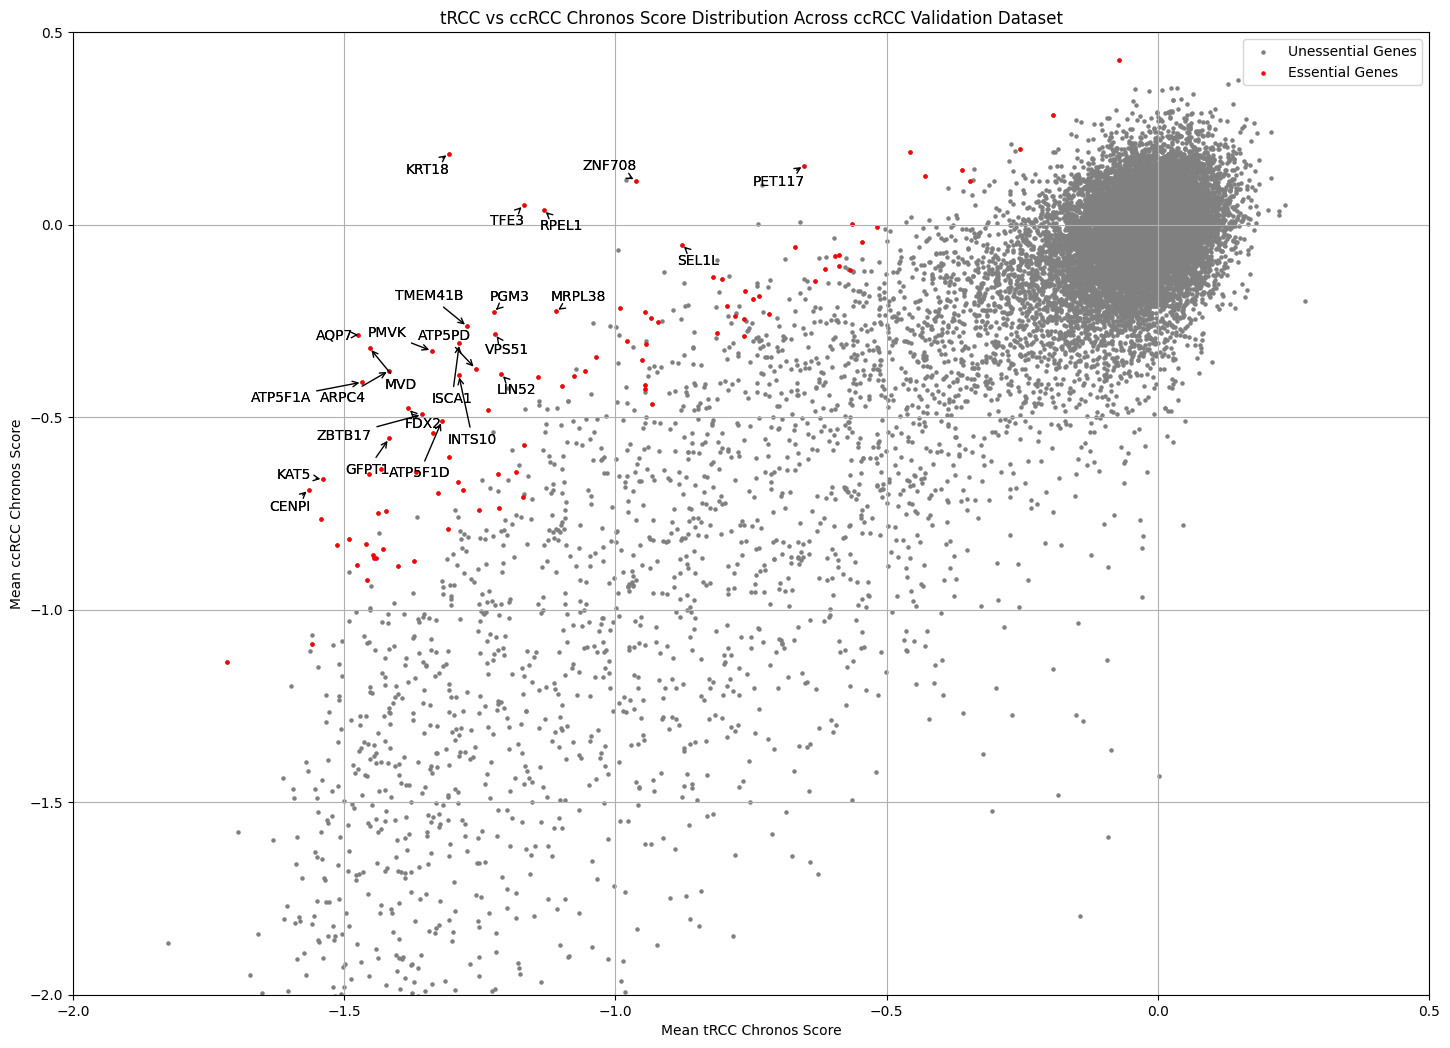

In [35]:
af.CreateDependencyPlot(mean_fil_tRCC_dfci, 
                        mean_fil_ccRCC_dfci, 
                        essential_genes_tRCC_ccRCC_dfci, 
                        'Mean tRCC Chronos Score', 
                        'Mean ccRCC Chronos Score', 
                        'tRCC vs ccRCC Chronos Score Distribution Across ccRCC Validation Dataset',
                        'Unessential Genes', 
                        'Essential Genes')

# DepMap tRCC/CCL CHRONOS Score

In [14]:
depmap_gene_effect_23Q2 = pd.read_csv('/Users/harshel/Documents/harvard/predicting_cancer_gene_dependencies/datasets/depmap_datasets/23Q2/CRISPRGeneEffect.csv')
depmap_gene_effect_23Q2.set_index("ModelID", inplace=True)
depmap_gene_effect_23Q2.index.name = ""
depmap_gene_effect_23Q2.sort_index(axis=1, inplace=True)
depmap_gene_effect_23Q2.dropna(axis=1, inplace=True)

depmap_gene_effect_23Q2.columns = af.ExtractGenesNames(depmap_gene_effect_23Q2.columns)

# scaled and normalised depmap gene effects
# scaled_normalised_depmap_gene_effects_23Q2 = af.scale_normalize(depmap_gene_effect_23Q2)

In [15]:
depmap_gene_effect_23Q2

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
ACH-000001,-0.102725,0.058595,0.058246,-0.041881,-0.088661,0.170335,-0.015254,-0.223691,0.218612,0.025719,...,-0.084055,-0.084184,0.131495,0.238702,0.201712,-0.250381,0.045612,0.044154,0.146801,-0.473583
ACH-000004,0.008878,-0.077633,-0.099297,0.030120,-0.080334,-0.112404,0.298774,-0.125139,0.218675,0.222941,...,-0.066673,-0.443145,0.183618,0.058936,0.108711,0.056322,-0.355712,0.135310,0.200408,-0.076150
ACH-000005,-0.117950,0.013989,0.164099,0.184570,-0.201766,-0.202198,0.207814,-0.089192,-0.082624,0.119679,...,-0.151588,-0.402572,-0.073320,-0.114402,-0.009449,-0.198378,-0.135007,0.014708,-0.065341,-0.196296
ACH-000007,-0.049135,-0.089991,0.084994,0.129586,-0.041561,-0.014555,0.045143,-0.263324,-0.135143,0.229040,...,-0.273444,-0.533265,-0.016257,0.222234,0.086937,-0.070598,-0.412361,-0.003722,-0.277756,-0.410805
ACH-000009,0.004969,-0.098170,0.092887,0.110913,0.028599,-0.087008,0.073032,-0.240147,0.072294,0.112749,...,-0.212287,-0.326986,-0.037498,0.235983,-0.070229,-0.061208,-0.537773,0.084630,0.018678,-0.307176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002800,-0.000591,-0.118200,0.264553,0.117171,-0.323325,0.076171,0.025801,-0.115184,-0.155542,0.106708,...,0.159245,-0.301424,-0.031900,0.297571,-0.050877,-0.066423,-0.280812,-0.085753,-0.074035,-0.099549
ACH-002834,-0.046332,-0.105593,0.072203,0.058669,-0.254654,-0.046796,0.114660,-0.637864,0.090588,0.174153,...,-0.069967,-0.671956,-0.053672,-0.071521,-0.058631,0.028762,0.052414,-0.320080,-0.105069,-0.557717
ACH-002847,-0.036301,-0.074850,0.052350,0.097964,-0.150341,0.034993,0.114026,-0.401955,-0.037905,0.089964,...,-0.313018,-0.958124,0.123488,0.130380,0.046296,-0.054613,-0.220010,-0.212531,-0.092958,-0.486332


In [16]:
fil_tRCC_CCL_depmap, mean_fil_tRCC_CCL_depmap, fil_CCL_depmap, mean_fil_CCL_depmap, essential_genes_tRCC_CCL_depmap = af.ComputeDependencyAnalysis(tRCC_chronos_gene_effects, depmap_gene_effect_23Q2)

In [21]:
af.CheckGenes(genesCheck=genesCheck, df=essential_genes_tRCC_CCL_depmap)

{'MVK': True,
 'ATP5F1E': False,
 'HSCB': False,
 'FDX2': True,
 'ATP5F1A': False,
 'ATP5F1D': False,
 'ATP5PD': True,
 'ISCA1': False,
 'MVD': True,
 'PMVK': True,
 'DLST': False,
 'ISCA2': False,
 'SDHB': False,
 'TFE3': True,
 'ATP5ME': False,
 'SDHA': False,
 'ATP5PO': False,
 'UQCRQ': False}

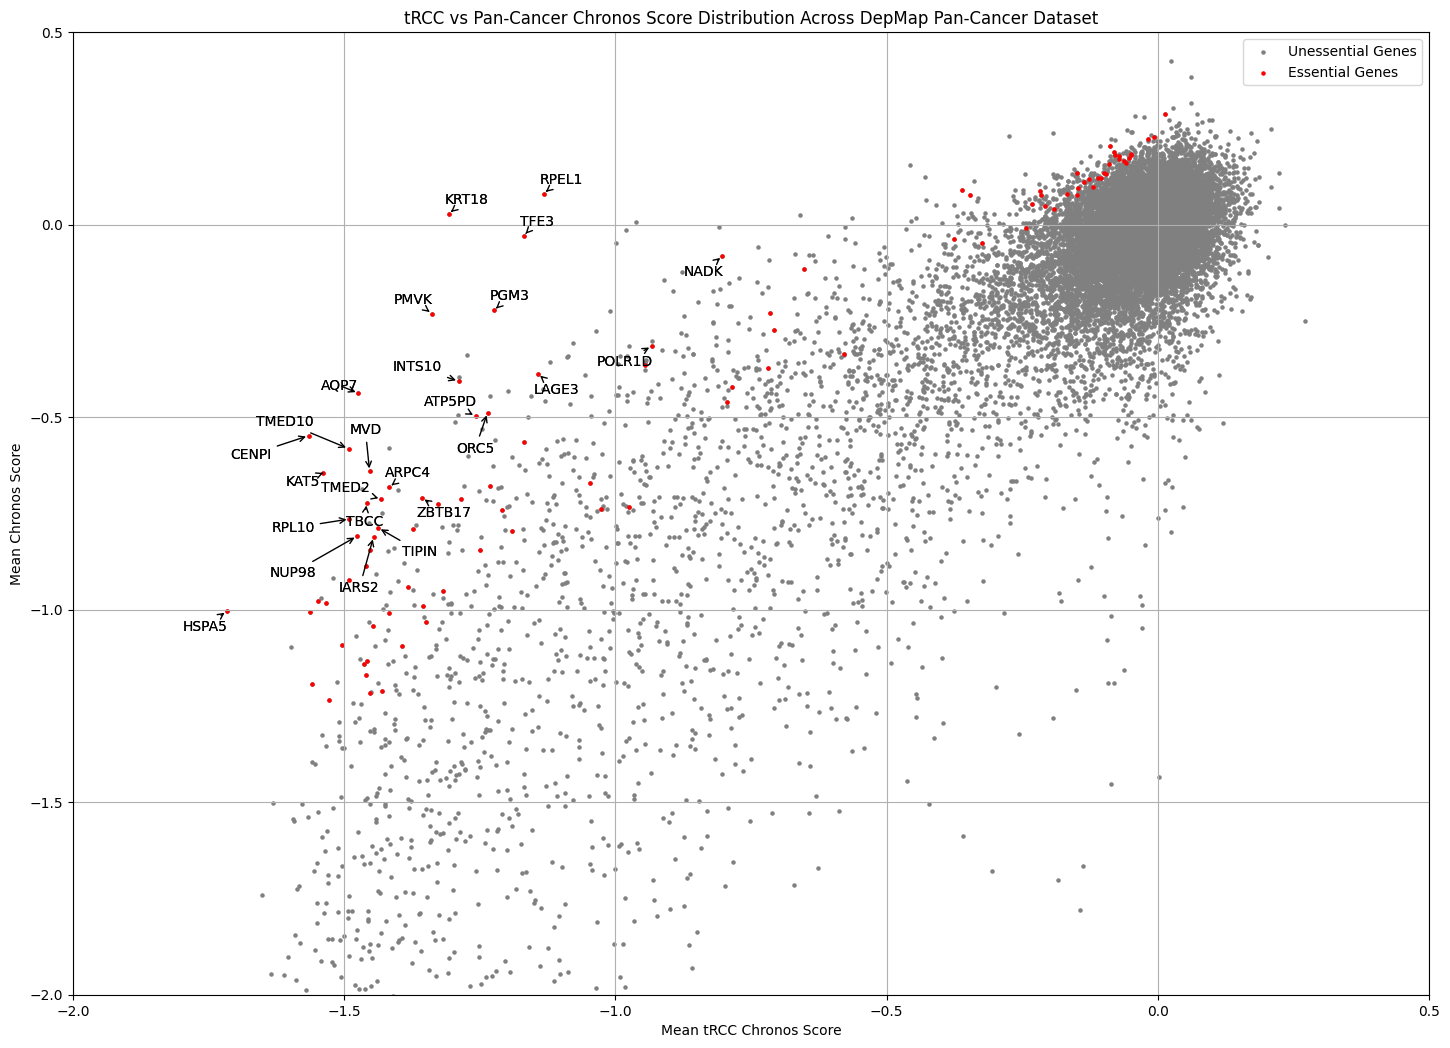

In [38]:
af.CreateDependencyPlot(mean_fil_tRCC_CCL_depmap, 
                        mean_fil_CCL_depmap, 
                        essential_genes_tRCC_CCL_depmap, 
                        'Mean tRCC Chronos Score', 
                        'Mean Chronos Score', 
                        'tRCC vs Pan-Cancer Chronos Score Distribution Across DepMap Pan-Cancer Dataset',
                        'Unessential Genes', 
                        'Essential Genes')

# DepMap tRCC/ccRCC Chronos Scores

In [41]:
depmap_ccRCC_data = pd.read_csv('/Users/harshel/Documents/harvard/predicting_cancer_gene_dependencies/datasets/depmap_datasets/CCLIDs/ccRCC_depmap_data.csv')

ccRCC_depmap_gene_effect_23Q2 = depmap_gene_effect_23Q2[depmap_gene_effect_23Q2.index.isin(depmap_ccRCC_data["depmapId"])]
ccRCC_depmap_gene_effect_23Q2

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
ACH-000159,-0.094712,-0.137591,0.078154,0.005829,-0.007497,-0.014295,0.160703,-0.239136,-0.005549,0.158619,...,-0.214795,-0.989132,0.031462,-0.030596,-0.157422,-0.194422,-0.235938,0.022554,-0.132493,-0.349422
ACH-000246,-0.087822,-0.016881,0.039359,0.088539,-0.086544,-0.158796,-0.094407,-0.169423,0.042005,0.135429,...,-0.431499,-0.510842,-0.040590,0.018313,-0.109734,0.046407,-0.245817,-0.288742,-0.002399,-0.191332
ACH-000250,-0.101502,-0.007643,0.073445,0.112681,-0.142043,-0.131931,0.081763,-0.161609,-0.067671,0.073303,...,-0.123243,-0.320637,0.143855,0.183750,-0.155249,-0.000555,-0.159988,-0.043896,0.025660,-0.245173
ACH-000262,-0.211962,0.102939,0.105905,0.106259,-0.130436,0.099388,0.155385,-0.342191,-0.004001,0.083557,...,-0.340361,-0.691398,0.118290,-0.055141,-0.191830,-0.021908,-0.310319,-0.202366,-0.108070,-0.517056
ACH-000272,-0.040996,-0.085965,0.037628,0.116145,-0.204229,-0.032905,0.062697,-0.071290,0.043986,0.099893,...,-0.402469,-0.492076,-0.030954,0.075204,-0.056918,0.035365,-0.173830,-0.034636,-0.095232,-0.225417
ACH-000313,-0.113832,-0.101404,0.128648,0.124386,-0.177495,-0.053775,0.074751,-0.203273,0.015924,0.057884,...,0.004683,-0.442883,0.126030,0.330771,-0.020090,-0.046287,-0.180943,-0.070030,-0.109529,-0.220947
ACH-000411,-0.116429,0.085805,0.065252,0.087363,-0.183623,-0.158704,0.038503,-0.206661,-0.013878,0.045221,...,-0.331944,-0.326123,-0.006059,0.225604,0.021517,-0.033585,-0.204950,-0.069241,-0.221703,-0.495718
ACH-000433,-0.192426,0.027420,0.164015,0.142623,-0.148679,0.108587,-0.100357,-0.325591,-0.139773,0.142295,...,-0.162338,-0.697947,-0.023135,-0.044821,0.174814,-0.101191,0.048855,-0.086903,-0.122279,-0.147291
ACH-000459,0.185075,0.061845,-0.055029,0.065483,-0.436653,-0.079321,-0.063317,0.087054,-0.127658,0.166037,...,0.060643,-0.335876,0.174213,0.111439,0.380390,-0.226860,-0.248628,0.074021,0.013996,-0.191791


In [24]:
fil_tRCC_ccRCC_depmap, mean_fil_tRCC_ccRCC_depmap, fil_ccRCC_depmap, mean_fil_ccRCC_depmap, essential_genes_tRCC_ccRCC_depmap = af.ComputeDependencyAnalysis(tRCC_chronos_gene_effects, ccRCC_depmap_gene_effect_23Q2)

In [26]:
af.CheckGenes(genesCheck=genesCheck, df=essential_genes_tRCC_ccRCC_depmap)

{'MVK': False,
 'ATP5F1E': False,
 'HSCB': True,
 'FDX2': True,
 'ATP5F1A': True,
 'ATP5F1D': True,
 'ATP5PD': True,
 'ISCA1': True,
 'MVD': True,
 'PMVK': True,
 'DLST': True,
 'ISCA2': True,
 'SDHB': True,
 'TFE3': True,
 'ATP5ME': True,
 'SDHA': True,
 'ATP5PO': False,
 'UQCRQ': False}

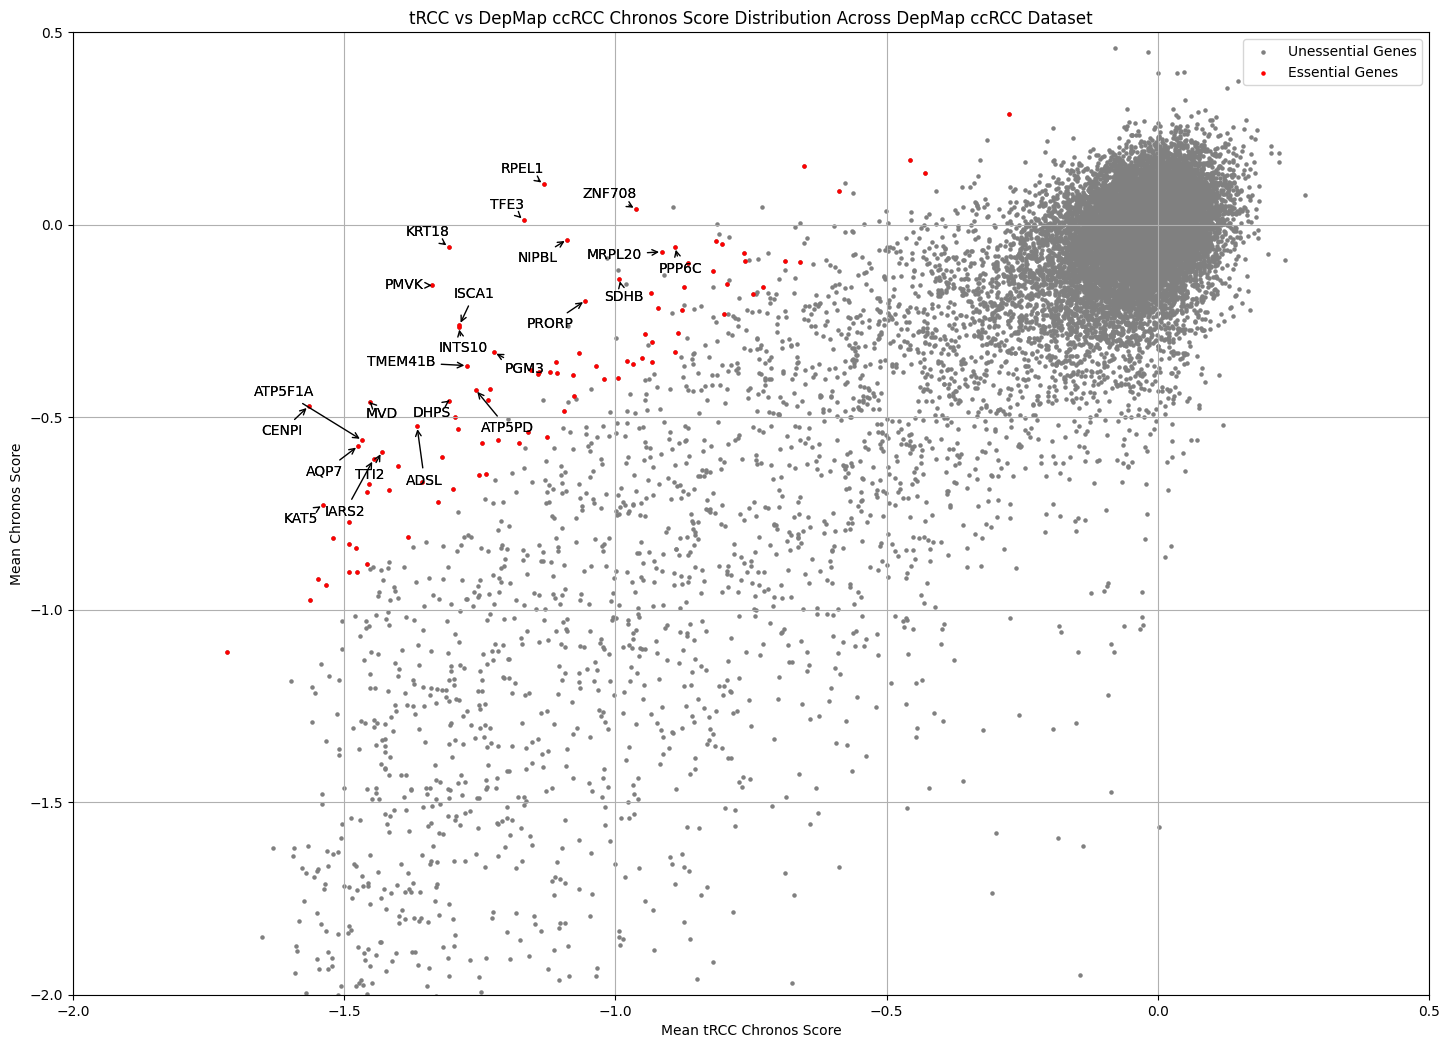

In [40]:
af.CreateDependencyPlot(mean_fil_tRCC_ccRCC_depmap, 
                        mean_fil_ccRCC_depmap, 
                        essential_genes_tRCC_ccRCC_depmap, 
                        'Mean tRCC Chronos Score', 
                        'Mean Chronos Score', 
                        'tRCC vs DepMap ccRCC Chronos Score Distribution Across DepMap ccRCC Dataset',
                        'Unessential Genes', 
                        'Essential Genes')

# # DepMap tRCC/RCC Chronos Scores

In [37]:
depmap_RCC_data = pd.read_csv("/Users/harshel/Documents/harvard/predicting_cancer_gene_dependencies/datasets/depmap_datasets/CCLIDs/RCC_depmap_data.csv")

RCC_depmap_gene_effect_23Q2 = depmap_gene_effect_23Q2[depmap_gene_effect_23Q2.index.isin(depmap_RCC_data["depmapId"])]
RCC_depmap_gene_effect_23Q2

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
ACH-000159,-0.094712,-0.137591,0.078154,0.005829,-0.007497,-0.014295,0.160703,-0.239136,-0.005549,0.158619,...,-0.214795,-0.989132,0.031462,-0.030596,-0.157422,-0.194422,-0.235938,0.022554,-0.132493,-0.349422
ACH-000189,0.072996,0.090618,-0.068657,0.210611,0.152060,0.080668,0.044678,-0.197176,0.009398,0.262064,...,-0.176592,-0.795498,0.337358,0.035441,-0.178653,-0.149128,-0.467706,-0.067851,-0.088492,-0.295206
ACH-000234,0.133576,-0.038739,-0.044765,0.142624,-0.162937,-0.185347,0.046380,-0.227069,-0.196662,0.146701,...,0.055215,-0.270229,-0.079516,0.027621,-0.073244,0.062877,-0.230145,0.049119,-0.381921,-0.327881
ACH-000246,-0.087822,-0.016881,0.039359,0.088539,-0.086544,-0.158796,-0.094407,-0.169423,0.042005,0.135429,...,-0.431499,-0.510842,-0.040590,0.018313,-0.109734,0.046407,-0.245817,-0.288742,-0.002399,-0.191332
ACH-000250,-0.101502,-0.007643,0.073445,0.112681,-0.142043,-0.131931,0.081763,-0.161609,-0.067671,0.073303,...,-0.123243,-0.320637,0.143855,0.183750,-0.155249,-0.000555,-0.159988,-0.043896,0.025660,-0.245173
ACH-000262,-0.211962,0.102939,0.105905,0.106259,-0.130436,0.099388,0.155385,-0.342191,-0.004001,0.083557,...,-0.340361,-0.691398,0.118290,-0.055141,-0.191830,-0.021908,-0.310319,-0.202366,-0.108070,-0.517056
ACH-000272,-0.040996,-0.085965,0.037628,0.116145,-0.204229,-0.032905,0.062697,-0.071290,0.043986,0.099893,...,-0.402469,-0.492076,-0.030954,0.075204,-0.056918,0.035365,-0.173830,-0.034636,-0.095232,-0.225417
ACH-000313,-0.113832,-0.101404,0.128648,0.124386,-0.177495,-0.053775,0.074751,-0.203273,0.015924,0.057884,...,0.004683,-0.442883,0.126030,0.330771,-0.020090,-0.046287,-0.180943,-0.070030,-0.109529,-0.220947
ACH-000317,-0.021228,-0.207098,0.068600,0.015759,-0.301172,0.024789,0.008364,-0.030318,0.042525,0.091677,...,-0.128879,-0.298970,-0.061941,0.144111,-0.086397,-0.052827,-0.073299,-0.060473,0.042087,-0.263790


In [29]:
fil_tRCC_RCC_depmap, mean_fil_tRCC_RCC_depmap, fil_RCC_depmap, mean_fil_RCC_depmap, essential_genes_tRCC_RCC_depmap = af.ComputeDependencyAnalysis(tRCC_chronos_gene_effects, RCC_depmap_gene_effect_23Q2)

In [30]:
af.CheckGenes(genesCheck=genesCheck, df=essential_genes_tRCC_RCC_depmap)

{'MVK': False,
 'ATP5F1E': False,
 'HSCB': True,
 'FDX2': False,
 'ATP5F1A': True,
 'ATP5F1D': True,
 'ATP5PD': True,
 'ISCA1': True,
 'MVD': True,
 'PMVK': True,
 'DLST': True,
 'ISCA2': False,
 'SDHB': True,
 'TFE3': True,
 'ATP5ME': True,
 'SDHA': True,
 'ATP5PO': True,
 'UQCRQ': False}

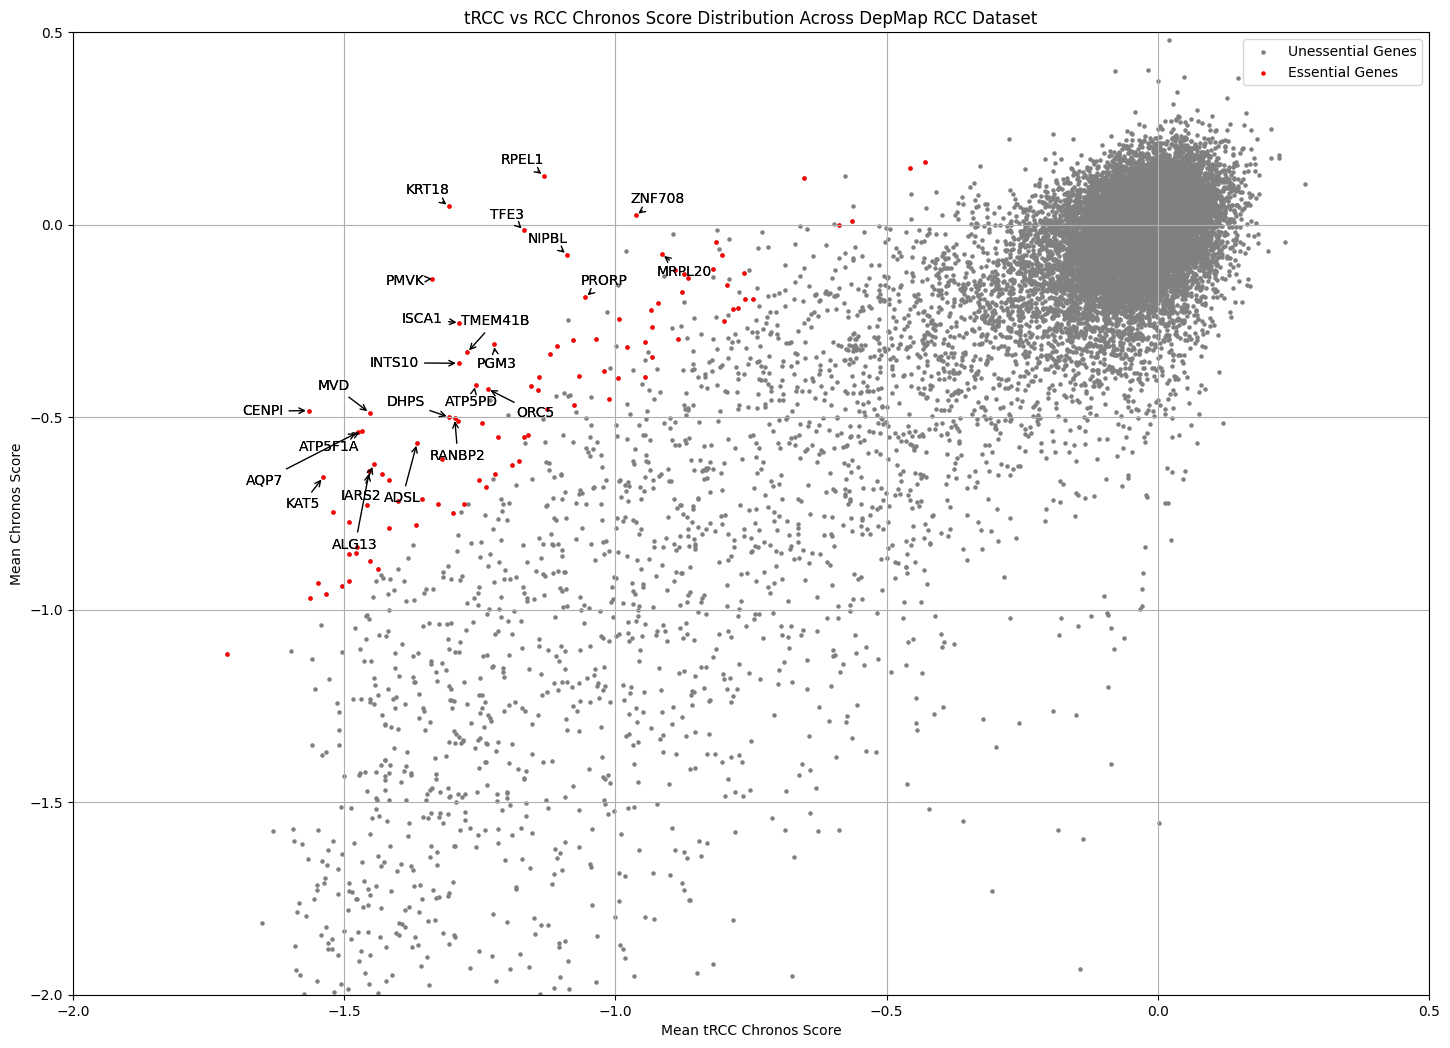

In [39]:
af.CreateDependencyPlot(mean_fil_tRCC_RCC_depmap, 
                        mean_fil_RCC_depmap, 
                        essential_genes_tRCC_RCC_depmap, 
                        'Mean tRCC Chronos Score', 
                        'Mean Chronos Score', 
                        'tRCC vs RCC Chronos Score Distribution Across DepMap RCC Dataset',
                        'Unessential Genes', 
                        'Essential Genes')

In [32]:
commonEssentialGenes = af.CommonIndexes([essential_genes_tRCC_CCL_depmap, essential_genes_tRCC_ccRCC_depmap, essential_genes_tRCC_RCC_depmap])
commonEssentialGenes = pd.DataFrame({"gene": commonEssentialGenes})

print("The common essential genes found across analysing against the various cell line analyses: \n{0}\n".format(commonEssentialGenes.to_string()))
print("Number of common essential genes across all analyses: {0}".format(len(commonEssentialGenes)))

The common essential genes found across analysing against the various cell line analyses: 
      gene
0    KRT18
1    RPEL1
2     TFE3
3     PMVK
4     AQP7
5    CENPI
6     PGM3
7   TMED10
8     KAT5
9   INTS10
10     MVD
11  ATP5PD
12   LAGE3
13    ORC5
14    TBCC
15   RPL10
16    NADK
17   HSPA5
18   NUP98
19  ZBTB17
20   IARS2
21  POLR1D
22    RPN2
23   DDX23
24   CEBPZ
25  NUP155
26    FNTA
27  PET117

Number of common essential genes across all analyses: 28


In [33]:
top_genes_no = 100

top_essential_genes = af.TopUniqueGenes([essential_genes_tRCC_CCL_depmap, essential_genes_tRCC_ccRCC_depmap, essential_genes_tRCC_RCC_depmap], top_genes_no=top_genes_no)

print("The top essential genes ({0}) found across analysing against the various cell line analyses: \n{1}\n".format(top_genes_no, top_essential_genes.to_string()))

The top essential genes (100) found across analysing against the various cell line analyses: 
       Gene     Score
0     KRT18 -1.355451
1     RPEL1 -1.259844
2      PMVK -1.198310
3      TFE3 -1.180835
4     CENPI -1.094291
5     NIPBL -1.050703
6      TP53 -1.040129
7      AQP7 -1.036416
8     ISCA1 -1.033119
9    INTS10 -1.023701
10   ZNF708 -1.002442
11     PGM3 -1.001491
12      MVD -0.992314
13  TMEM41B -0.941383
14  ATP5F1A -0.930366
15   TMED10 -0.910172
16     KAT5 -0.894245
17    PRORP -0.867420
18     SDHB -0.853341
19     DHPS -0.849414
20   MRPL20 -0.843990
21   ATP5PD -0.842825
22     ADSL -0.841977
23     TTI2 -0.840839
24    IARS2 -0.836583
25    PPP6C -0.832189
26    ALG13 -0.813927
27     ORC5 -0.809209
28     GMNN -0.805860
29   PET117 -0.804855
30   RANBP2 -0.797850
31   PTPMT1 -0.791665
32     RFC1 -0.785419
33  EXOSC10 -0.780067
34    BARD1 -0.780015
35    ASH2L -0.778189
36     ECT2 -0.774799
37     SKA2 -0.773908
38   MRPL15 -0.771761
39   MRPL44 -0.766124
40  

In [34]:
### Saving lists of essential genes to txt file

if os.path.isdir("testGenes"):
    shutil.rmtree("testGenes")

os.makedirs("testGenes")
commonEssentialGenes.to_csv("./testGenes/top_common_essential_genes")
top_essential_genes.to_csv("./testGenes/top_essential_genes")


In [ ]:
def scale(column):
    column_mean = column.mean()
    column_std = column.std()
    return (column - column_mean) / column_std

neg_scaled_df = pd.concat([
    scale(FUUR1["neg|score"]),
    scale(STFE["neg|score"]),
    scale(UOK109["neg|score"]),
    scale(UOK146["neg|score"])
], axis=1)

neg_mean_df = pd.DataFrame({"mean_neg_score": neg_scaled_df.mean(axis=1)})

neg_mean_df.insert(0, 'gene_name', neg_mean_df.index)
neg_mean_df.reset_index(drop=True, inplace=True)

# neg_mean_df.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']
# neg_mean_df['mean_neg_score'] = neg_mean_df.mean(axis=1)

neg_mean_df["mean_neg_score"] = np.log10(-neg_mean_df["mean_neg_score"])

# pos_mean_df = pd.concat([
#     FUUR1.sort_values("pos|score")["pos|score"], 
#     STFE.sort_values("pos|score")["pos|score"], 
#     UOK109.sort_values("pos|score")["pos|score"], 
#     UOK146.sort_values("pos|score")["pos|score"]
#     ], axis=1)

# pos_mean_df.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']
# pos_mean_df['mean_pos_score'] = pos_mean_df.mean(axis=1)

# pos_mean_df = -np.log10(pos_mean_df.sort_values("mean_pos_score", ascending=True))

print(neg_mean_df) # Higher mean score means more negatively selective genes (genes confer cell death)
# print(pos_mean_df) # Higher mean score means more positively selective genes (genes confer cell proliferation)

In [ ]:
avanaGE = pd.read_csv("../datasets/avana/avana_ceres_gene_effects.csv", sep=",")
avanaGE.set_index('Unnamed: 0', inplace=True)

avanaLogFC = pd.read_csv("../datasets/avana/avana_sgRNA_logFCnorm.csv", sep=",")
avanaLogFC.set_index('Unnamed: 0', inplace=True)

avanaRC = pd.read_csv("../datasets/avana/avana_sgRNA_raw_readcounts.csv", sep=",")
avanaRC.set_index('Unnamed: 0', inplace=True)

In [ ]:
GEMean_df = pd.DataFrame(avanaGE.mean(axis=1), columns=['meanGE'])
sorted_GEMean = GEMean_df.sort_values(by='meanGE', ascending=False)
sorted_GEMean

In [ ]:
# neg_mean_df = neg_mean_df.sort_values(by="mean_neg_score")

sorted_GEMean['ceres_rank'] = sorted_GEMean['meanGE'].rank()
print(sorted_GEMean)
merged_df = neg_mean_df.merge(sorted_GEMean, left_index=True, right_index=True, how='inner')

ceres_threshold = 0.0275 * len(merged_df)

filtered_df = merged_df[merged_df['ceres_rank'] > ceres_threshold]

essential_df = filtered_df.sort_values(by='mag_rank').head(20)

top_specific_genes = np.array(essential_df.index)

essential_df
# merged_df

In [ ]:
plt.figure(figsize=(12, 12))

plt.scatter(merged_df['meanGE'][:1000], merged_df['mean_neg_score'][:1000], color='blue', label='Common Tumour Essential Genes', alpha=0.5)

selected_genes_df = merged_df.loc[top_specific_genes]
plt.scatter(selected_genes_df['meanGE'], selected_genes_df['mean_neg_score'], color='red', label='TRCC Essential Genes')

texts = []  # Create an array to store the annotations

for gene, row in selected_genes_df.iterrows():
    annotation = plt.annotate(
        gene,
        (row['meanGE'], row['mean_neg_score']),
        fontsize=11,
        # xytext=(10, 10),  # Offset the text from the data point
        # textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            color='black',
            lw=0.5,
            connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
            alpha=0.5,  # Adjust transparency
        )
    )
    texts.append(annotation)  # Append the annotation to the array

# Use adjust_text to avoid overlapping annotations
adjust_text(texts)

plt.xlabel('meanGE (CERES)')
plt.ylabel('Mean -log10(neg|score)')
plt.title('Comparison of Gene Essentiality: TRCC vs Common Tumour Essential Genes')
plt.legend()
plt.grid(True)

min_value = merged_df['meanGE'].min()
plt.xlim(min_value - 0.1 * abs(min_value), 0)

plt.tight_layout()
plt.show()




In [ ]:
neg_TRCC = pd.concat([
    FUUR1.sort_values("neg|score")["neg|score"], 
    STFE.sort_values("neg|score")["neg|score"], 
    UOK109.sort_values("neg|score")["neg|score"], 
    UOK146.sort_values("neg|score")["neg|score"]
    ], axis=1)

neg_TRCC.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']

all_cell_lines = neg_TRCC.merge(avanaGE, left_index=True, right_index=True, how='inner')

def standardize_series(s):
    return (s - s.mean()) / s.std()

standardized_df = all_cell_lines.apply(standardize_series, axis=0)

df = standardized_df.drop(columns=['FUUR1', 'STFE', 'UOK109', 'UOK146'])

df_essential = df.loc[top_specific_genes]
cell_line_data = standardized_df[['FUUR1', 'STFE', 'UOK109', 'UOK146']].loc[top_specific_genes]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

plt.suptitle('Comparison of Gene Essentiality Scores: TRCC (RRA lo) vs Common Tumours (CERES)', y=1.0)
plt.subplots_adjust(top=0.92)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cell_line_colors = {'FUUR1': '#9467bd', 'STFE': '#8c564b', 'UOK109': '#e377c2', 'UOK146': '#7f7f7f'}

for ax, (gene, row) in zip(axes.flatten(), df_essential.iterrows()):
    # Using boxplot from matplotlib for the distributions
    bp = ax.boxplot(row, positions=[1], patch_artist=True, vert=True) # Only one position for the box plot
    
    # Set colors for box plots and adjust outlier transparency
    for patch, color in zip(bp['boxes'], [colors[0]]):  # only one box, so use the first color
        patch.set_facecolor(color)
    for whisker in bp['whiskers']:
        whisker.set(color=colors[0], linewidth=1.2)
    for cap in bp['caps']:
        cap.set(color=colors[0], linewidth=1.2)
    for median in bp['medians']:
        median.set(color='black', linewidth=1.2)
    for flier in bp['fliers']:
        flier.set(markerfacecolor=colors[0], alpha=0.2)

    # Plotting the cell line data as dots
    x_values = [1] * len(cell_line_data.columns)  # Same X position for all points
    y_values = [cell_line_data[cell_line].loc[gene] for cell_line in cell_line_data.columns]
    for i, cell_line in enumerate(cell_line_data.columns):
        ax.scatter(x_values[i], y_values[i], color=cell_line_colors[cell_line], label=cell_line, alpha=1.0, s=50, edgecolor='black', zorder=2)  # Adjust s for dot size if needed

    # To avoid repeating legends for every subplot, we'll add the legend to just one subplot (like the first one).
    if ax == axes[0, 0]:  # First subplot
        ax.legend(loc='upper right', bbox_to_anchor=(1.075, 1))
        # ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
    
    ax.set_title(gene)
    ax.set_ylabel('Standardized Gene Score', fontsize=10, labelpad=5)
    ax.set_xticks([1])  # Only one tick for the box plot
    ax.set_xticklabels([gene], rotation=0)
    ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.5)

plt.subplots_adjust(wspace=-0.5)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

FUUR1_df = -np.log10(FUUR1[["neg|score", "neg|p-value"]])
FUUR1_df["neg|p-value"] = -np.log10(FUUR1["neg|p-value"])
FUUR1_df["neg|score"] = -np.log10(FUUR1["neg|score"])
FUUR1_df = FUUR1_df.sort_values("neg|score", ascending=False)

plt.scatter(FUUR1_df[:1000]["neg|p-value"], FUUR1_df[:1000]["neg|score"], s=1)

texts = []
for id, gene in FUUR1_df.iterrows():
    if id in top_specific_genes:
        annotation = plt.annotate(
            id,
            (gene["neg|p-value"], gene["neg|score"]),
            fontsize=8,
            #  xytext=(-0.25, 0.1),
            textcoords='offset points',
            arrowprops=dict(
            arrowstyle="->",
            color='black',
            lw=0.5,
            connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
            alpha=0.5,  # Adjust transparency
        )
        )
        texts.append(annotation)

# Use adjust_text to avoid overlapping annotations
adjust_text(texts)

plt.xlabel("-10log(p-value)")
plt.ylabel("Neg Selection Score (RRA lo)")
plt.title("FUUR1 Negative Selection Ranking")
plt.show()

In [ ]:
plt.scatter(negSortedUOK109[:2000]["neg|p-value"], -np.log10(negSortedUOK109[:2000]["neg|score"]), s=1)
plt.xlabel('Score P-value')
plt.ylabel("RRA Neg Score")
plt.title("UOK109 Negative Selection Ranking")
plt.show()

In [ ]:
plt.scatter(negSortedUOK146[:2000]["neg|p-value"], -np.log10(negSortedUOK146[:2000]["neg|score"]), s=1)
plt.xlabel('Score P-value')
plt.ylabel("RRA Neg Score")
plt.title("UOK146 Negative Selection Ranking")
plt.show()